# Retail Sales Analysis

In [6]:
# Import dependencies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df =pd.read_csv('./retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
# Check for missing values in each column
missing_values_count = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values_count}")

Missing values in each column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [4]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Descriptive Analysis

In [9]:
df['Gender'].value_counts()

Female    510
Male      490
Name: Gender, dtype: int64

There are two gender categories. Male and Female, with 510 females and 490 male. 

In [14]:
df['Age'].value_counts()

43    31
64    31
57    30
51    30
34    28
54    28
22    27
62    27
42    26
47    26
46    25
23    24
40    24
50    23
27    23
52    22
60    22
30    22
26    22
31    22
35    22
28    21
41    21
18    21
55    21
20    21
19    21
21    20
25    20
49    19
56    19
32    19
38    19
61    18
39    18
48    18
63    17
45    17
59    17
53    17
29    16
37    16
36    15
44    15
24    15
58    14
33    10
Name: Age, dtype: int64

In [15]:
# Group age
# Create age bins
bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]  
labels = ['0-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Check the value counts for these new age bins
age_group_counts = df['Age Group'].value_counts().sort_index()
age_group_counts


0-20      42
21-25    107
26-30    102
31-35    101
36-40     90
41-45    117
46-50    105
51-55    120
56-60    101
61-65    115
66+        0
Name: Age Group, dtype: int64

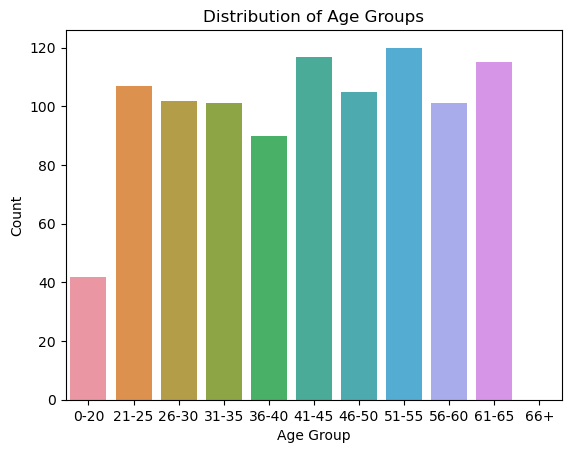

In [16]:
sns.countplot(x='Age Group', data=df, order=labels)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

#### Product Categories

In [7]:
df['Product Category'].value_counts()

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

There are 3 product categories that the store deals with. The summary indicates that there are 351 transactions in 'Clothing', 342 in 'Electronics', and 307 in 'Beauty'.

In [17]:
# Create the cross-tabulation between Gender and Product Category
cross_tab = pd.crosstab(df['Gender'], df['Product Category'])

# Display the cross-tabulation
cross_tab

Product Category,Beauty,Clothing,Electronics
Gender,,,
Female,166,174,170
Male,141,177,172


### How does customer age and gender influence their purchasing behavior?

#### Average Spending by Age and Gender

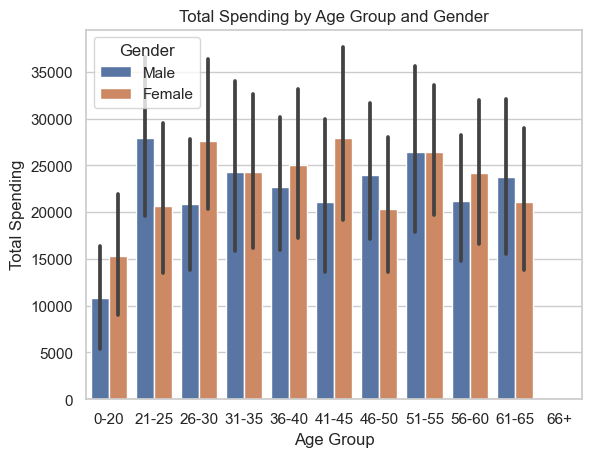

In [35]:
sns.barplot(x='Age Group', y='Total Amount', hue='Gender', data=df, estimator=sum)
plt.title('Total Spending by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.legend(title='Gender')
plt.show()

<Axes: xlabel='Product Category'>

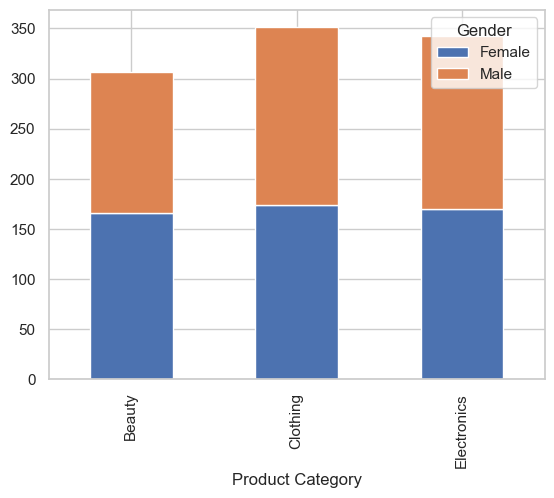

In [34]:
df_grouped = df.groupby(['Product Category', 'Gender']).size().unstack().fillna(0)
df_grouped.plot(kind='bar', stacked=True)

#### Product Category Preferences by Age and Gender

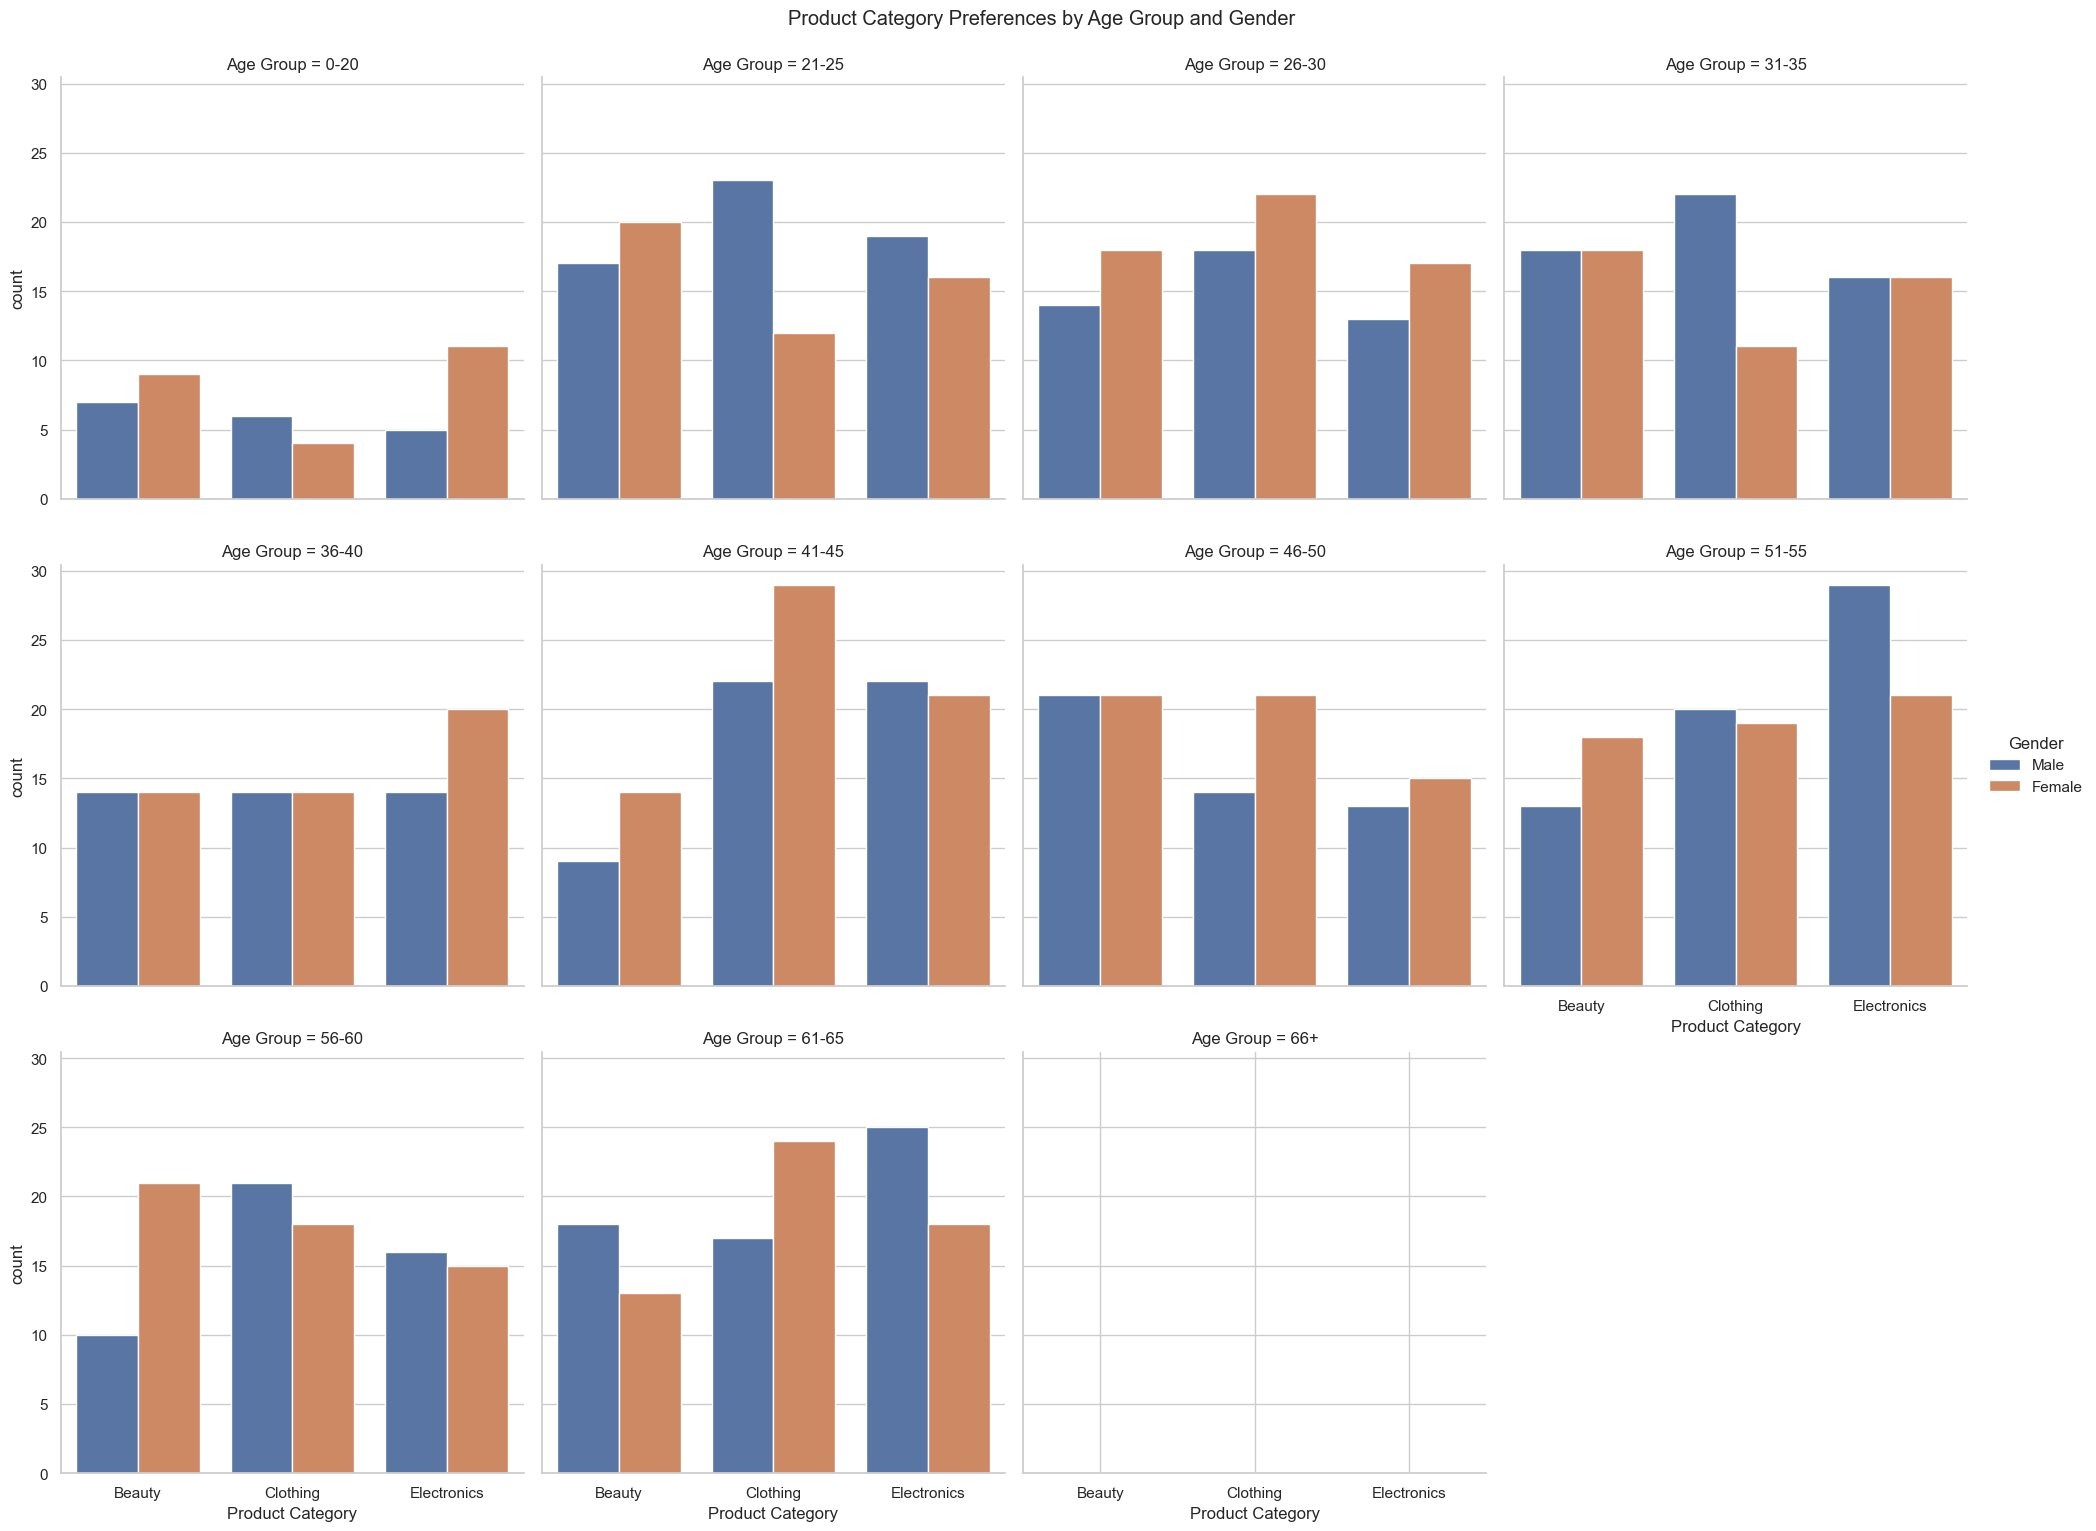

In [37]:
sns.catplot(x='Product Category', hue='Gender', col='Age Group', data=df, kind='count', col_wrap=4)
plt.suptitle('Product Category Preferences by Age Group and Gender', y=1.02)
plt.show()

#### Quantity of Products Purchased by Age and Gender

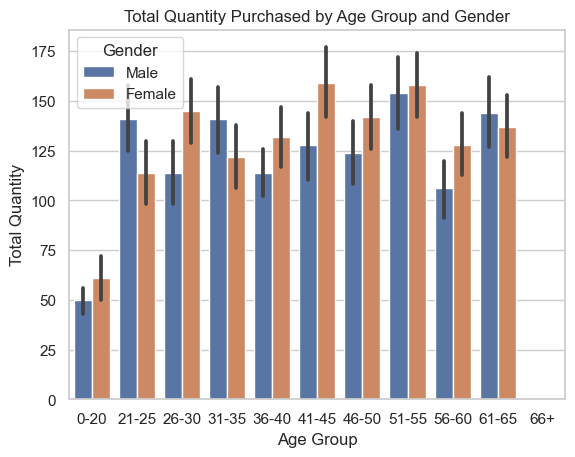

In [38]:
sns.barplot(x='Age Group', y='Quantity', hue='Gender', data=df, estimator=sum)
plt.title('Total Quantity Purchased by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity')
plt.legend(title='Gender')
plt.show()

### Are there discernible patterns in sales across different time periods?

#### Seasonality Trend

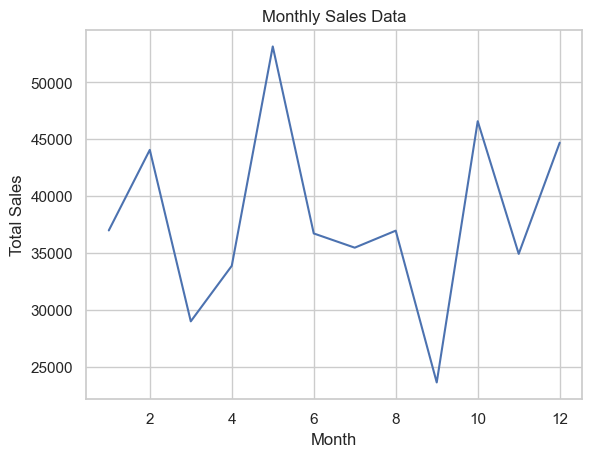

In [40]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a 'Month' column
df['Month'] = df['Date'].dt.month

# Aggregate total sales by month
monthly_sales = df.groupby('Month')['Total Amount'].sum()

# Plotting
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Data')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


#### Day of the Week Analysis

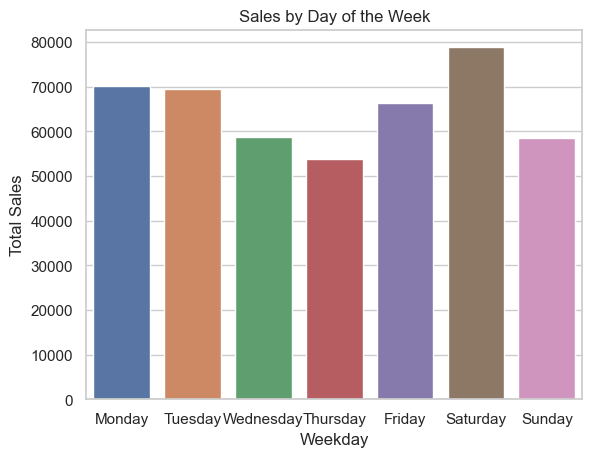

In [41]:
# Create a 'Weekday' column
df['Weekday'] = df['Date'].dt.day_name()

# Aggregate total sales by weekday
weekday_sales = df.groupby('Weekday')['Total Amount'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plotting
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title('Sales by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.show()

### Which product categories hold the highest appeal among customers?

#### Overall Sales by Category

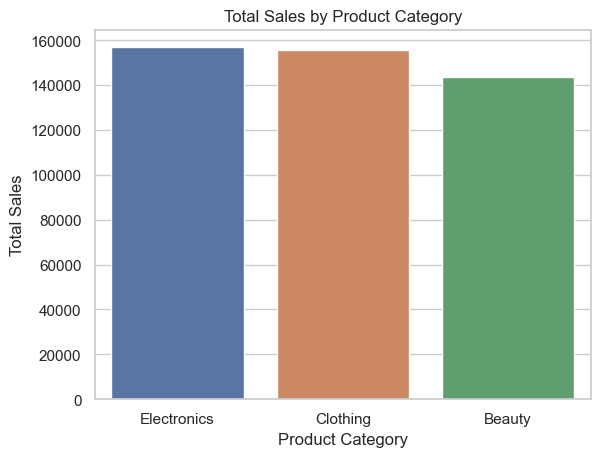

In [43]:
# Aggregate total sales by product category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plotting
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

#### Quantity of Products Sold by Category

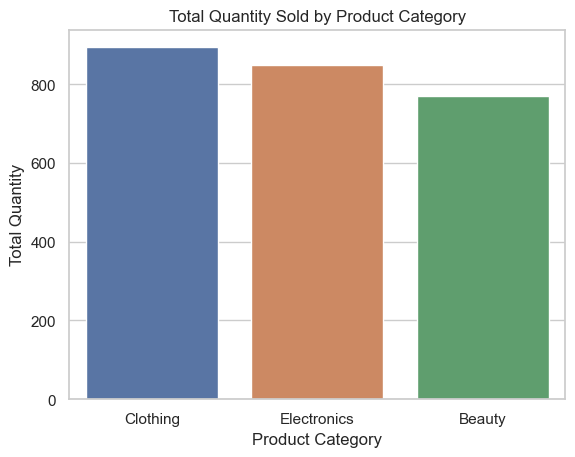

In [44]:
# Aggregate total quantity sold by product category
category_quantity = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

# Plotting
sns.barplot(x=category_quantity.index, y=category_quantity.values)
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity')
plt.show()

#### Average Spending per Transaction by Category

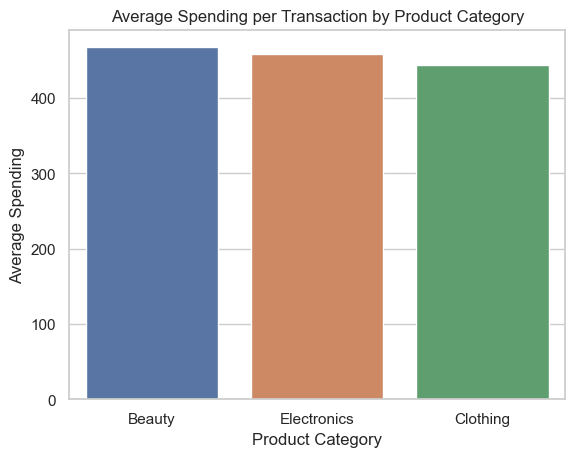

In [45]:
# Calculate average spending per transaction by product category
avg_spend_category = df.groupby('Product Category')['Total Amount'].mean().sort_values(ascending=False)

# Plotting
sns.barplot(x=avg_spend_category.index, y=avg_spend_category.values)
plt.title('Average Spending per Transaction by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Spending')
plt.show()


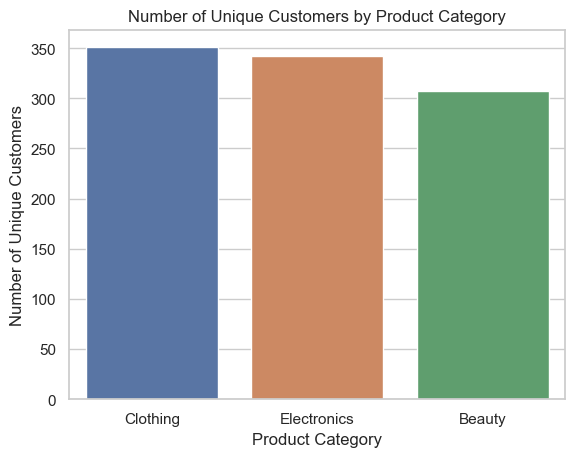

In [46]:
# Count unique customers by product category
unique_customers_category = df.groupby('Product Category')['Customer ID'].nunique().sort_values(ascending=False)

# Plotting
sns.barplot(x=unique_customers_category.index, y=unique_customers_category.values)
plt.title('Number of Unique Customers by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Unique Customers')
plt.show()


### What are the relationships between age, spending, and product preferences?

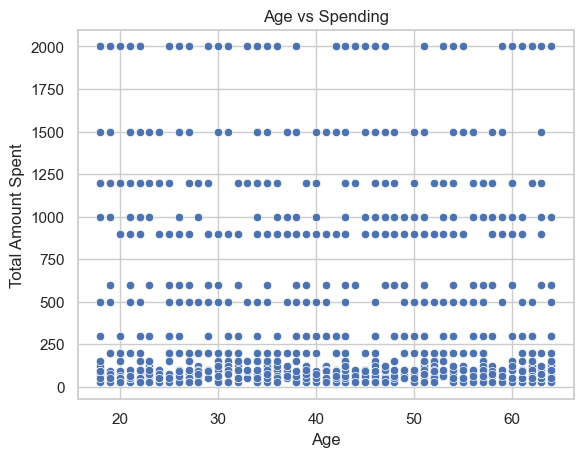

In [47]:
sns.scatterplot(x='Age', y='Total Amount', data=df)
plt.title('Age vs Spending')
plt.xlabel('Age')
plt.ylabel('Total Amount Spent')
plt.show()

#### Age Groups and Product Preferences

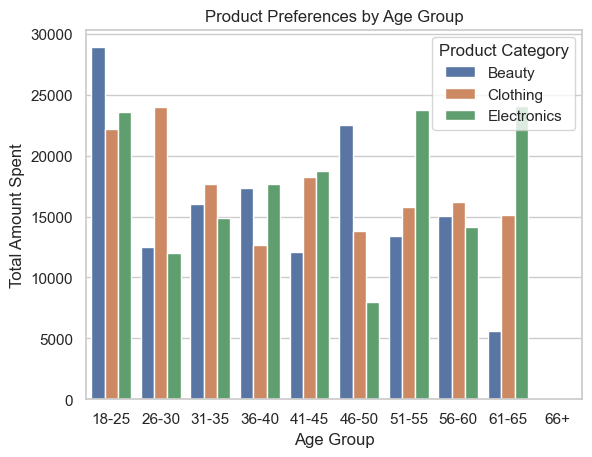

In [49]:
# Create age groups
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]
labels = ['18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age groups and product categories
age_group_product_df = df.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().reset_index()

# Create a barplot
sns.barplot(x='Age Group', y='Total Amount', hue='Product Category', data=age_group_product_df)
plt.title('Product Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount Spent')
plt.legend(title='Product Category')
plt.show()


### How do customers adapt their shopping habits during seasonal trends?

#### Seasonal Product Preferences

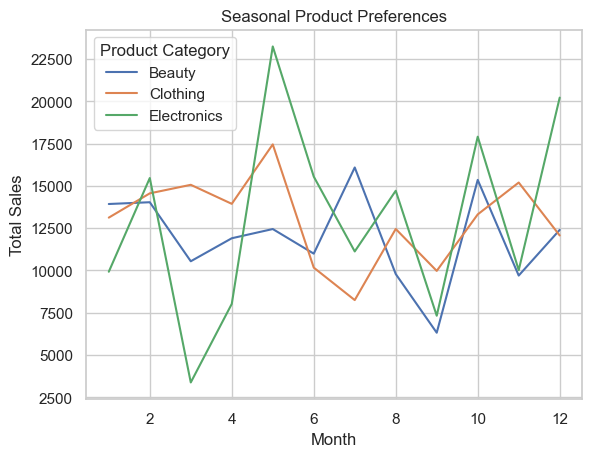

In [50]:
# Aggregate sales by month and category
monthly_category_sales = df.groupby(['Month', 'Product Category'])['Total Amount'].sum().reset_index()

# Plotting
sns.lineplot(x='Month', y='Total Amount', hue='Product Category', data=monthly_category_sales)
plt.title('Seasonal Product Preferences')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.show()

#### Average Transaction Amount per Season

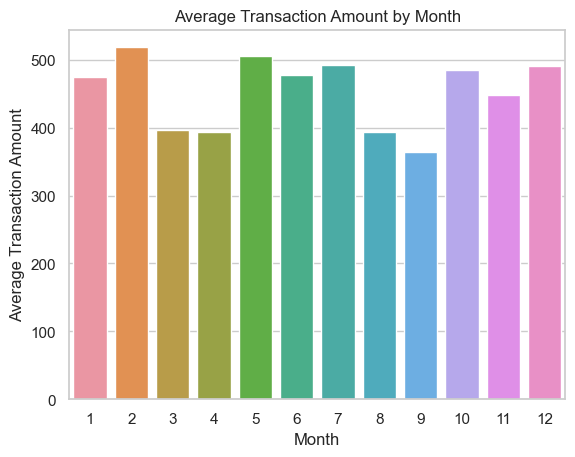

In [51]:
# Calculate the average transaction amount by month
avg_monthly_spend = df.groupby('Month')['Total Amount'].mean()

# Plotting
sns.barplot(x=avg_monthly_spend.index, y=avg_monthly_spend.values)
plt.title('Average Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Transaction Amount')
plt.show()

#### Quantity of Products Bought

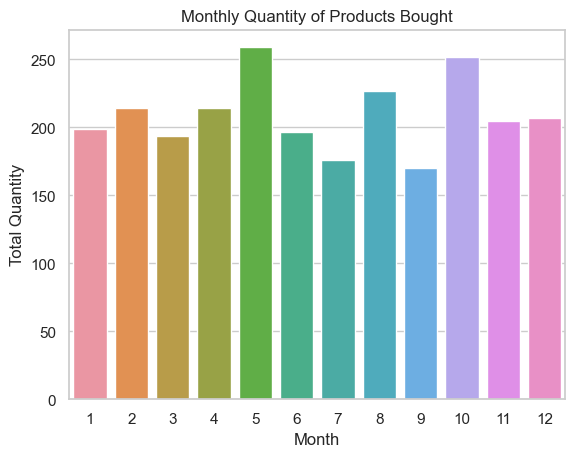

In [52]:
# Aggregate quantity by month
monthly_quantity = df.groupby('Month')['Quantity'].sum()

# Plotting
sns.barplot(x=monthly_quantity.index, y=monthly_quantity.values)
plt.title('Monthly Quantity of Products Bought')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.show()

#### Seasonal Trends by Demographics

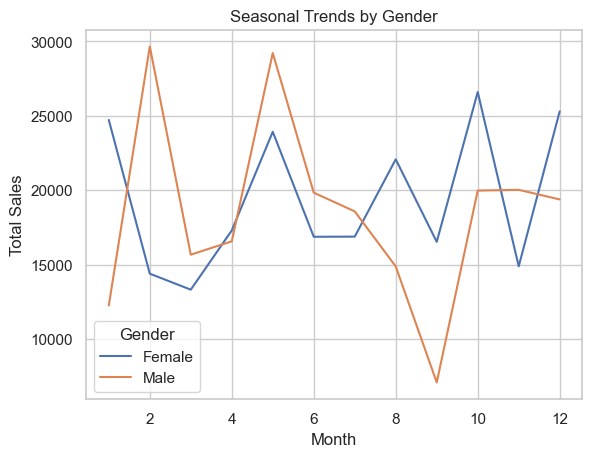

In [53]:
# Aggregate sales by month and gender
monthly_gender_sales = df.groupby(['Month', 'Gender'])['Total Amount'].sum().reset_index()

# Plotting
sns.lineplot(x='Month', y='Total Amount', hue='Gender', data=monthly_gender_sales)
plt.title('Seasonal Trends by Gender')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Gender')
plt.show()

### Are there distinct purchasing behaviors based on the number of items bought per transaction?

#### Average Spending per Transaction Quantity

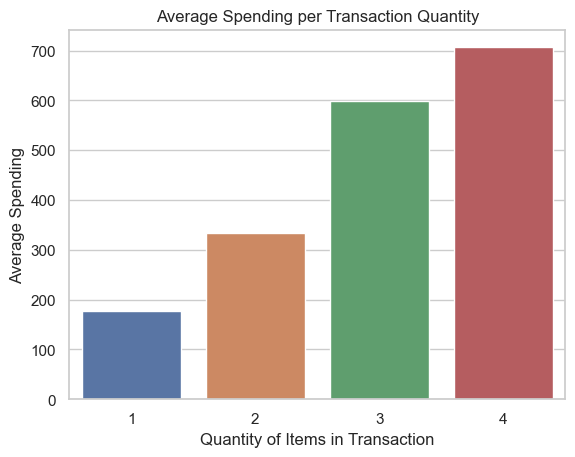

In [54]:
# Grouping by Quantity to get mean of Total Amount
avg_spend_per_quantity = df.groupby('Quantity')['Total Amount'].mean().reset_index()

# Plotting
sns.barplot(x='Quantity', y='Total Amount', data=avg_spend_per_quantity)
plt.title('Average Spending per Transaction Quantity')
plt.xlabel('Quantity of Items in Transaction')
plt.ylabel('Average Spending')
plt.show()


#### Product Category Preferences Based on Quantity

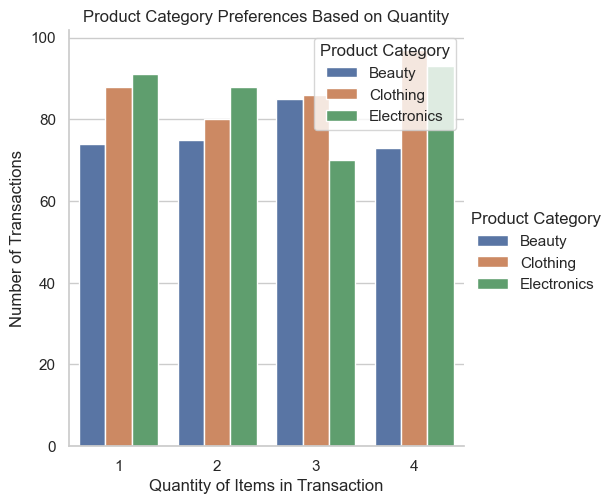

In [55]:
# Group by Product Category and Quantity
category_quantity = df.groupby(['Product Category', 'Quantity'])['Transaction ID'].count().reset_index()

# Plotting
sns.catplot(x='Quantity', y='Transaction ID', hue='Product Category', kind='bar', data=category_quantity)
plt.title('Product Category Preferences Based on Quantity')
plt.xlabel('Quantity of Items in Transaction')
plt.ylabel('Number of Transactions')
plt.legend(title='Product Category')
plt.show()


####  Impact of Quantity on Seasonal Trends

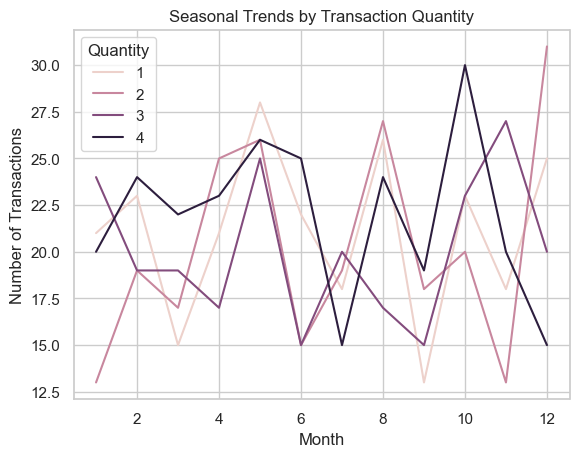

In [56]:
# Group by Month and Quantity
seasonal_quantity = df.groupby(['Month', 'Quantity'])['Transaction ID'].count().reset_index()

# Plotting
sns.lineplot(x='Month', y='Transaction ID', hue='Quantity', data=seasonal_quantity)
plt.title('Seasonal Trends by Transaction Quantity')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Quantity')
plt.show()

#### Gender and Quantity

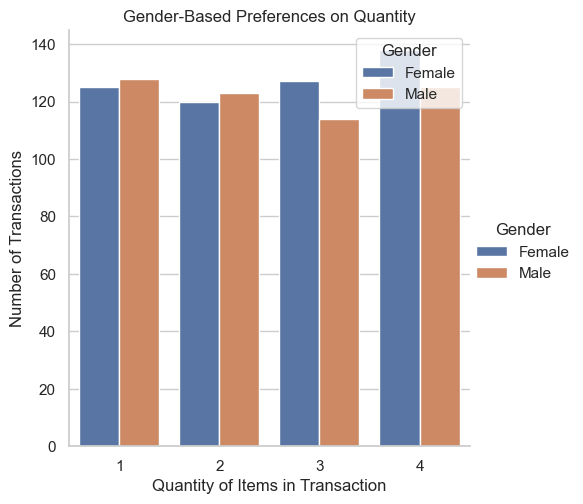

In [57]:
# Group by Gender and Quantity
gender_quantity = df.groupby(['Gender', 'Quantity'])['Transaction ID'].count().reset_index()

# Plotting
sns.catplot(x='Quantity', y='Transaction ID', hue='Gender', kind='bar', data=gender_quantity)
plt.title('Gender-Based Preferences on Quantity')
plt.xlabel('Quantity of Items in Transaction')
plt.ylabel('Number of Transactions')
plt.legend(title='Gender')
plt.show()


#### Quantity and Age

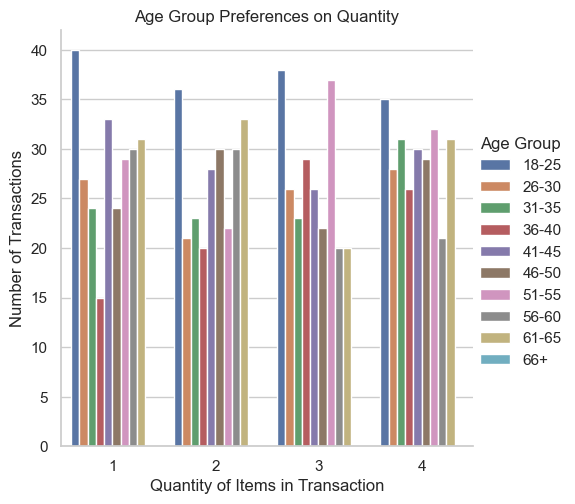

In [59]:
# Group by Age Group and Quantity (assuming you already created an 'Age Group' column as in previous examples)
age_quantity = df.groupby(['Age Group', 'Quantity'])['Transaction ID'].count().reset_index()

# Plotting
sns.catplot(x='Quantity', y='Transaction ID', hue='Age Group', kind='bar', data=age_quantity)
plt.title('Age Group Preferences on Quantity')
plt.xlabel('Quantity of Items in Transaction')
plt.ylabel('Number of Transactions')
plt.show()


### What insights can be gleaned from the distribution of product prices within each category?

In [61]:
# Basic statistics for each product category
price_stats = df.groupby('Product Category')['Price per Unit'].describe()

price_stats


,count,mean,std,min,25%,50%,75%,max
Product Category,,,,,,,,
Beauty,307.0,184.055375,194.929399,25.0,30.0,50.0,300.0,500.0
Clothing,351.0,174.287749,186.017065,25.0,30.0,50.0,300.0,500.0
Electronics,342.0,181.900585,189.049673,25.0,30.0,50.0,300.0,500.0


#### Price Distribution Plots

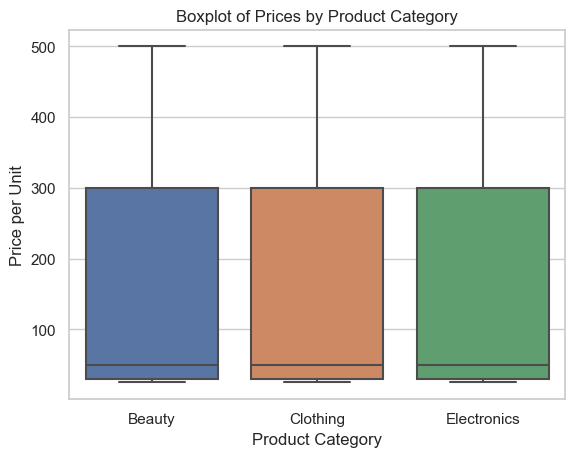

In [63]:
# Boxplot
sns.boxplot(x='Product Category', y='Price per Unit', data=df)
plt.title('Boxplot of Prices by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price per Unit')
plt.show()


#### Price and Sales Relationship

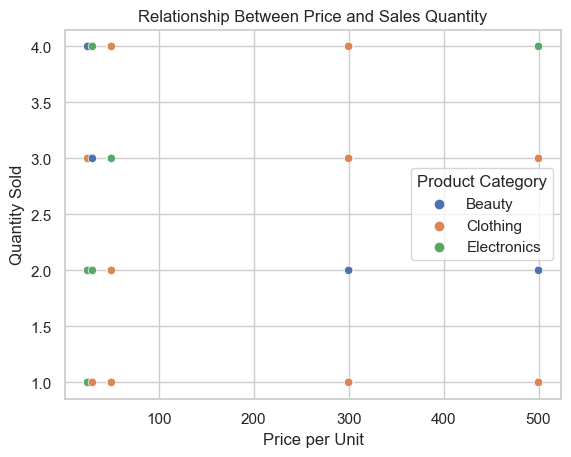

In [67]:
# Scatter plot between Price and Quantity
sns.scatterplot(x='Price per Unit', y='Quantity', hue='Product Category', data=df)
plt.title('Relationship Between Price and Sales Quantity')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Category')
plt.show()


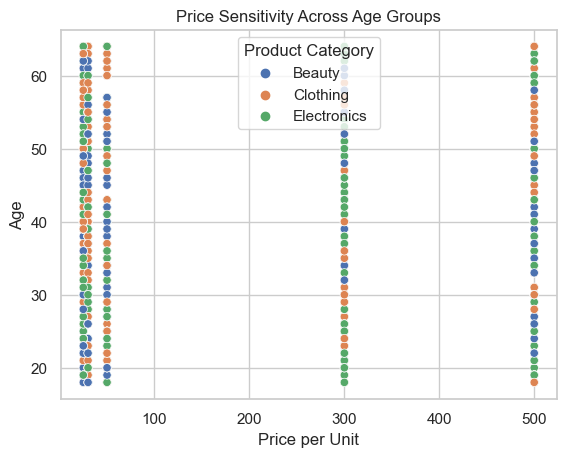

In [68]:
# Price and Age
sns.scatterplot(x='Price per Unit', y='Age', hue='Product Category', data=df)
plt.title('Price Sensitivity Across Age Groups')
plt.xlabel('Price per Unit')
plt.ylabel('Age')
plt.legend(title='Product Category')
plt.show()
